In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

data_path = 'data/'
symbols_path = 'symbols/'

In [2]:
def plot_gray(img):
    plt.imshow(img, vmin = 0, vmax = 255, cmap = 'gray')
    
def plot_color(img):
    plt.imshow(img)
    
def plot_in_window(img):
    cv.namedWindow('image', cv.WINDOW_NORMAL)
    cv.imshow('image', img)
    cv.waitKey(0)
    cv.destroyAllWindows()
    
def resize(img):
    max_resolution = 1000
    rs_factor = max_resolution / max(data.shape)
    if rs_factor >= 1:
        return img
    return cv.resize(img, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)

In [65]:
data = cv.imread(data_path + 'bach-114.jpg', cv.IMREAD_GRAYSCALE)
rs_factor = 1500 / max(data.shape)
data = cv.resize(data, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)

In [4]:
def get_contour(img):
    _, img = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    contours, _ = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    return contours[np.argmax([cv.contourArea(c) for c in contours])]

In [5]:
symbol_paths = ['Quarter-Note/1.png', 'Eighth-Note/2.png', 'Sharp/1.png', 'Note-Heads/1.png', 'Note-Heads/3.png']
symbols = []
for s in symbol_paths:
    symbol = cv.imread(symbols_path + s, cv.IMREAD_GRAYSCALE)
    #_, symbol = cv.threshold(symbol, 127, 255, cv.THRESH_BINARY_INV)
    symbols.append(symbol)

In [98]:
def measure(c):
    _, s, _ = cv.minAreaRect(c)
    return cv.contourArea(c) / ( s[0] * s[1] )

In [ ]:
img = data.copy()
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 15, 2)
contours, _ = cv.findContours(img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))
img3 = cv.cvtColor(data, cv.COLOR_GRAY2RGB)

for i, contour in enumerate(contours):
    if len(contour) > 2:
        val = [cv.matchShapes(contour, s, cv.CONTOURS_MATCH_I3, 0) for s in symbols]
        #val = [np.abs(measure(contour) - measure(s)) for s in symbols]
        print(val)
        color = [0, 0, 0]
        color[np.argmin(val)] = 255;
        cv.drawContours(img3, contours, i, color, 1)

plot_in_window(img3)

In [39]:
plt.figure(figsize = (22, 22))
plot_in_window(img)

<Figure size 1584x1584 with 0 Axes>

In [63]:
staff_lines

[(1.0, 16.0, 0, 1080),
 (280.0309139784946, 0.8911290322580645, 86, 1000),
 (285.0, 0.3571428571428572, 88, 1000),
 (294.0, 0.30489510489510474, 87, 1000),
 (302.0013717421125, 1.290809327846365, 86, 1000),
 (311.0, 1.1696551724137931, 86, 1000),
 (360.0, 0.0, 86, 1000),
 (369.0, 0.32373113854595337, 86, 1000),
 (381.7636612021858, 0.8538251366120218, 87, 1000),
 (386.0, 1.0, 87, 1000),
 (395.0, 0.0, 86, 1000),
 (531.64453125, 0.9270833333333335, 86, 1002),
 (531.8264248704663, 1.071243523316062, 86, 1002),
 (544.1378002528445, 2.3489254108723134, 86, 1002),
 (552.6237623762377, 1.0594059405940595, 86, 1002),
 (563.0, 0.21595598349381007, 86, 1002),
 (612.0, 0.2764786795048142, 86, 1002),
 (620.0, 1.0, 86, 1002),
 (629.0, 1.3361227336122732, 87, 1002),
 (637.8938172043011, 1.4045698924731185, 86, 1002),
 (646.589709762533, 0.9722955145118735, 86, 1002),
 (783.4761273209549, 1.819628647214854, 86, 1000),
 (783.4921052631579, 1.7223684210526318, 86, 1000),
 (796.8973747016706, 1.50357995

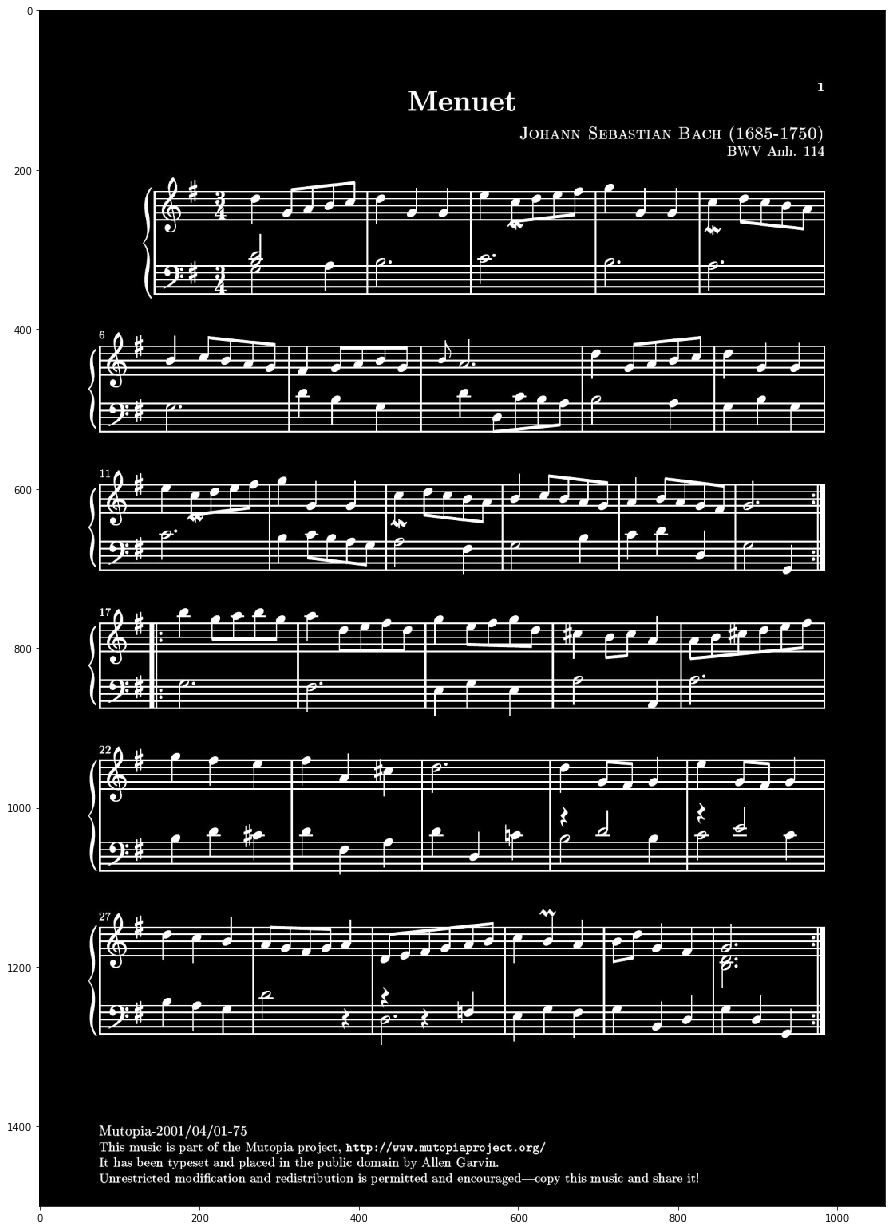

1500 1060 0.0 0.0


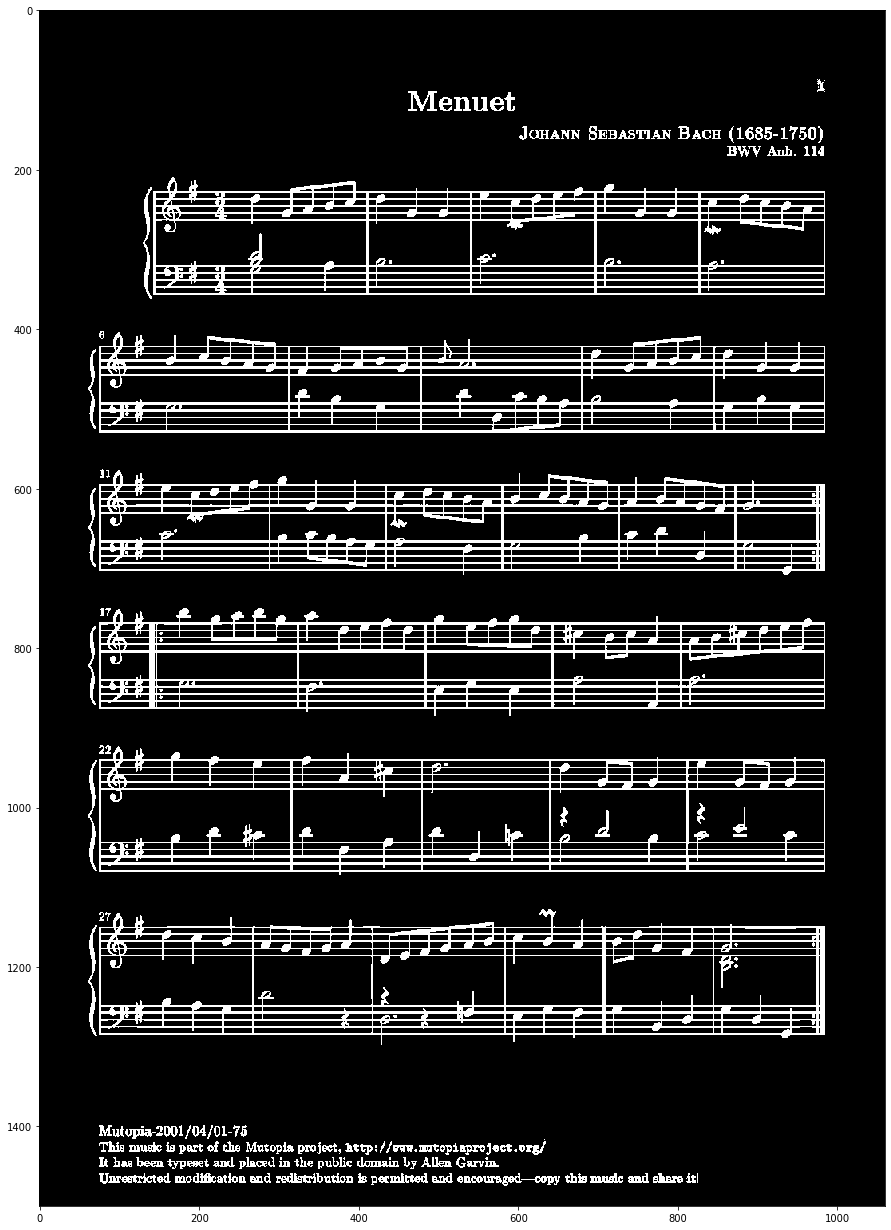

kolejno: wysokość wiersza, grubość wiersza, kolumna od lewej: początek, koniec
(1.0, 16.0, 0, 1079)
(237.0, 1.2078488372093021, 136, 1000)
(246.0, 1.8139534883720931, 136, 1000)
(255.0, 2.6845930232558137, 136, 1000)
(264.0, 2.6555232558139537, 136, 1000)
(272.9375, 2.136627906976744, 134, 1000)
(330.0, 1.0729927007299271, 134, 1000)
(339.0, 1.0, 136, 1000)
(348.0, 1.0, 136, 1000)
(356.9956458635704, 2.0, 136, 1000)
(365.98982558139534, 2.0, 136, 1000)
(435.48541114058355, 1.0318302387267906, 68, 1000)
(444.64550264550263, 2.124338624338624, 68, 1000)
(453.4520367936925, 2.42838370565046, 68, 1000)
(462.32063074901447, 2.064388961892247, 68, 1000)
(467.0, 2.0, 531, 1000)
(502.7074122236671, 2.46814044213264, 65, 1000)
(510.9783163265306, 2.3686224489795915, 67, 1000)
(518.4774436090225, 1.293233082706767, 67, 1000)
(529.0013495276653, 1.0, 67, 1000)
(537.9486842105263, 2.0, 67, 1000)
(609.1007957559682, 2.2824933687002655, 68, 1000)
(605.0, 2.4490861618798956, 68, 986)
(617.58823529411

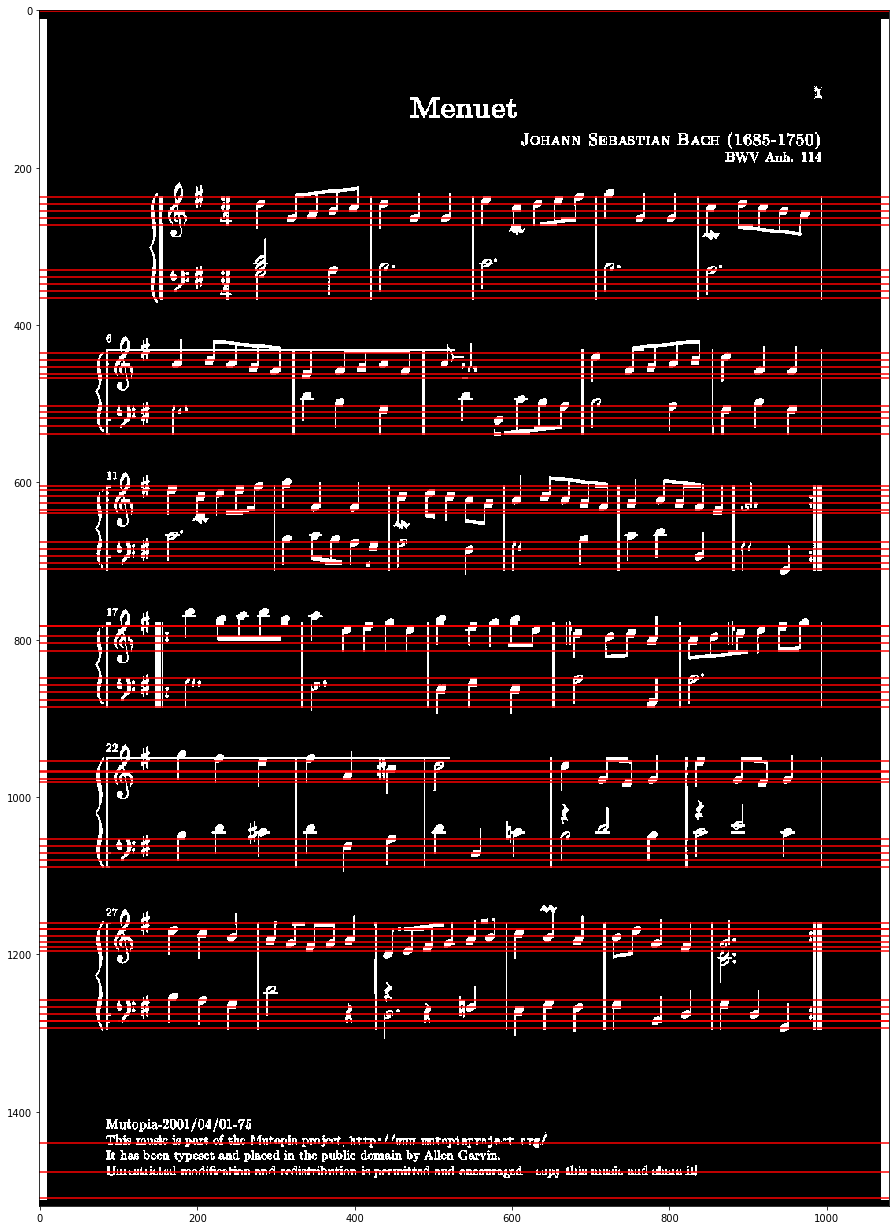

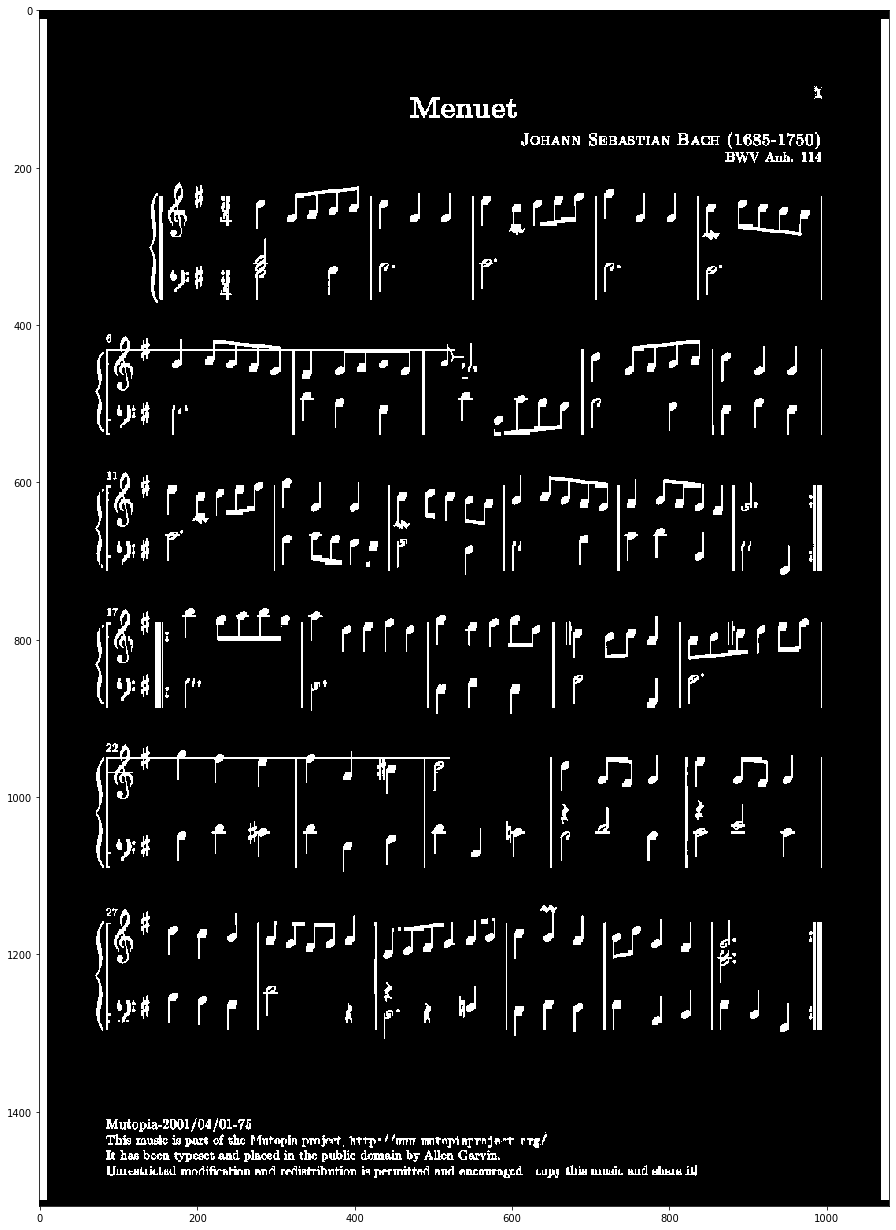

In [66]:
img, staff_lines, img_rotated = remove_staff_lines(data)

In [38]:
(staff_lines[47][0] - staff_lines[43][0])/4 * 1.25

11.43299385363063

In [67]:
#staff_height = staff_lines[47][0] - staff_lines[43][0]
staff_height = staff_lines[5][0] - staff_lines[1][0]
note_height = staff_height/4 * 1.25
#staff_width = 10

rs_factor = note_height / symbols[3].shape[0]
note_head = cv.resize(~symbols[3], None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
#_, note_head = cv.threshold(note_head, 127, 255, cv.THRESH_BINARY_INV)

rs_factor = note_height / symbols[4].shape[0]
note_head_empty = cv.resize(~symbols[4], None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
#_, note_head_empty = cv.threshold(note_head_empty, 127, 255, cv.THRESH_BINARY_INV)

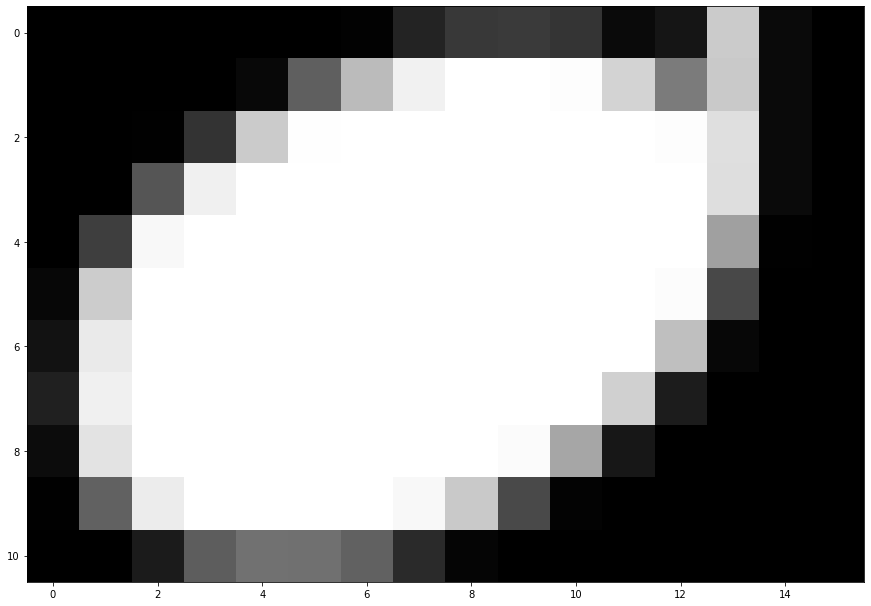

In [68]:
plt.figure(figsize = (15, 15))
plt.imshow(note_head, cmap = 'gray')

In [69]:
#img, _ = remove_staff_lines(data)
img_color = cv.cvtColor(img_rotated, cv.COLOR_GRAY2RGB)

result = cv.matchTemplate(img, note_head, method = cv.TM_SQDIFF_NORMED)
th = 0.3

h, w = note_head.shape
noteheads = np.nonzero(result < th)
detected_noteheads = set()
for x, y in zip(noteheads[1], noteheads[0]):
    x = max(0, x - w//2)
    y = max(0, y - h//2)
    #Remove multiple detections
    neighborhood = result[y:(y + h), x:(x + w)]
    note_y, note_x = np.unravel_index(np.argmin(neighborhood), neighborhood.shape)
    note_x = note_x + x
    note_y = note_y + y
    detected_noteheads.add((note_x, note_y))
    #img_color = cv.rectangle(img_color, (note_x, note_y), (note_x + w, note_y + h), (0, 255, 0), 1)

# Format: środek główki, bounding box, koniec ogonka, czy ogonek do góry
detected_notes = []
for x, y in detected_noteheads:
    # Detect stems
    up = img[max(y - round(staff_height) + h, 0):(y + h), x:(x + w)]
    down = img[y:(y + round(staff_height)), x:(x + w)]
    projection_up = cv.reduce(up, 0, cv.REDUCE_AVG)/255
    projection_down = cv.reduce(down, 0, cv.REDUCE_AVG)/255
    #projection_up[w//2 - w//5:w//2 + w//5] = 0
    #projection_down[w//2 - w//5:w//2 + w//5] = 0
    th = 0.55
    if np.max(projection_up) > th:
        stem_y = y
        stem_x = np.argmax(projection_up) + x
        while img[stem_y, stem_x] != 0:
            stem_y = stem_y - 1
        detected_notes.append(((x + w//2, y + h//2), ((x, stem_y), (x + w, y + h)), (stem_x, stem_y), True))
    elif np.max(projection_down) > th:
        stem_y = y + h
        stem_x = np.argmax(projection_down) + x
        while img[stem_y, stem_x] != 0:
            stem_y = stem_y + 1
        detected_notes.append(((x + w//2, y + h//2), ((x, y), (x + w, stem_y)), (stem_x, stem_y), False))
    else:
        plt.figure(figsize = (10, 6))
        projection = projection_up if np.max(projection_up) > np.max(projection_down) else projection_down
        plt.bar(range(0, len(projection[0])), projection[0], width = 0.7)
        plt.xlim(0, projection.shape[1])
        img_color = cv.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Check if note is an eight note and draw bounding box
for center, bbox, (stem_x, stem_y), is_up in detected_notes:
    if is_up:
        stem_end_roi = img[stem_y:stem_y + h, stem_x - w//2:stem_x + w//2]
    else:
        stem_end_roi = img[stem_y - h:stem_y, stem_x - w//2:stem_x + w//2]
    stem_end_avg = np.average(stem_end_roi)/255
    th = 0.3
    if stem_end_avg > 0.3:
        # Eight note
        img_color = cv.rectangle(img_color, bbox[0], bbox[1], (255, 0, 255), 1)
    else:
        # Quarter note
        img_color = cv.rectangle(img_color, bbox[0], bbox[1], (0, 255, 0), 1)
    
result = cv.matchTemplate(img, note_head_empty, method = cv.TM_SQDIFF_NORMED)
th = 0.65

h, w = note_head_empty.shape
noteheads = np.nonzero(result < th)
for p in zip(noteheads[1], noteheads[0]):
    img_color = cv.rectangle(img_color, p, (p[0] + w, p[1] + h), (255, 0, 0), 1)

plot_in_window(img_color)

In [44]:
plot_in_window(img)

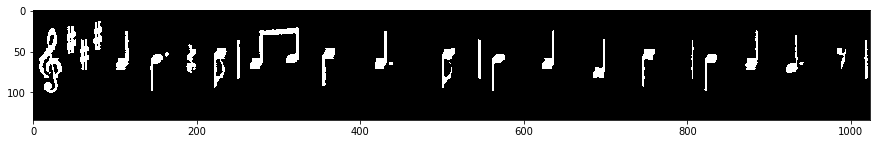

In [133]:
plt.figure(figsize = (15, 20))
plot_gray(img)

In [16]:
data.shape

(1500, 1060)

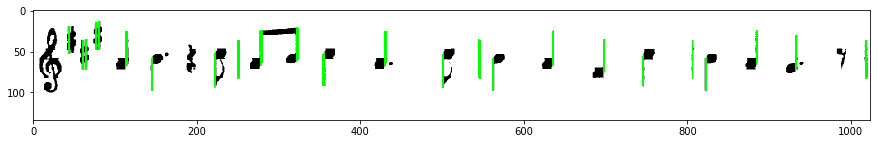

In [33]:
img = data.copy()
img_color = cv.cvtColor(data, cv.COLOR_GRAY2RGB)
img = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 15, 2)

result = cv.reduce(img, 0, cv.REDUCE_AVG)

staff_height = 50
th  = 0.25
for i, v in enumerate(result[0]/255):
    nz = np.nonzero(img[:,i])
    if (v > th):
        white = np.sum(img[nz[0][0]:nz[0][-1],i] == 0)
        if white < 10:
            img_color = cv.line(img_color, (i, nz[0][0]), (i, nz[0][-1]), (0, 255, 0))

plt.figure(figsize = (15, 8))
plt.imshow(img_color)
#plt.bar(range(0, len(result[0])), result[0]/255, width = 10)
#plt.xlim(0, data.shape[1])

In [134]:
np.max(result[0]/255)

0.43137254901960786

In [3]:
# Convert pdfs to jpgs
from pdf2image import convert_from_path
from os import listdir

for file in listdir(data_path):
    if file.endswith('.pdf'):
        img = convert_from_path(file)
        name = file.split('.')[0]
        for page in img:
            page.save(data_path + name + '.jpg')

In [15]:
# Resize jpgs
from os import listdir

for file in listdir('nowe/'):
    print(file)
    if file.endswith('.jpg'):
        img = cv.imread('nowe/' + file)
        if max(img.shape) > 1500:
            rs_factor = 1500 / max(img.shape)
            img = cv.resize(img, None, fx = rs_factor, fy = rs_factor, interpolation = cv.INTER_AREA)
            
        print('Saving', file)
        if not cv.imwrite('./data_smaller/' + file, img):
            print('Error writing image')

IMG_20191116_183044.jpg
Saving IMG_20191116_183044.jpg
IMG_20191116_184420.jpg
Saving IMG_20191116_184420.jpg
IMG_20191116_184357.jpg
Saving IMG_20191116_184357.jpg
IMG_20191116_184516.jpg
Saving IMG_20191116_184516.jpg
IMG_20191116_184427.jpg
Saving IMG_20191116_184427.jpg
IMG_20191116_182947.jpg
Saving IMG_20191116_182947.jpg
IMG_20191116_184423.jpg
Saving IMG_20191116_184423.jpg
IMG_20191116_184401.jpg
Saving IMG_20191116_184401.jpg
IMG_20191116_184455.jpg
Saving IMG_20191116_184455.jpg
IMG_20191116_183204.jpg
Saving IMG_20191116_183204.jpg


In [6]:
def remove_staff_lines(input_img):
    def binarization(bwimg):
        kernel=[0]*10
        #kernele do grafiki
        kernel[1]=np.asarray([[-1, -1, -1], [-1,8,-1], [-1, -1, -1]])
        kernel[2]=np.asarray([[0, 1, 0], [1,-4,1], [0, 1, 0]])
        kernel[3]=np.asarray([[0, 1, 0], [1,-5,1], [0, 1, 0]])
        kernel[4]=(1/9)*np.asarray([[1, 1, 1], [1,1,1], [1, 1, 1]])
        kernel[5]=(1/16)*np.asarray([[1, 2, 1], [2,4,2], [1, 2, 1]])
        kernel[6]=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
        dm=(7,7)
        kernel[7]=np.asarray([[1 for j in range(dm[0])] for i in range(dm[1])])
        kernel[8]=np.asarray([[0, -1, 0], [-1,5,-1], [0, -1, 0]])

        mg2=cv.filter2D(bwimg, -1, kernel[4])
        im3=cv.filter2D(mg2, -1, kernel[1])
        im4=cv.filter2D(im3, -1, kernel[7])

        return cv.adaptiveThreshold(bwimg, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 145, 1)

    def blackening(bwimg, path):
        s, t, gr=0, 0, 0
        st=[0]*20
        dep=[0]*len(path)
        end1=[0]*len(path)
        end2=[0]*len(path)

        for i in range(len(path)):
            s1v=bwimg[path[i][0]-10:path[i][0]+10, path[i][1]] if (path[i][0]+10<bwimg.shape[0] and path[i][0]-10>=0) else 0
            for ij in range(0, -10, -1):
                a, b=path[i][0]+ij, path[i][1]
                if (bwimg[a,b]==255):
                    break
            end1[i]=ij

            for ij in range(1, 10, 1):
                a, b=path[i][0]+ij, path[i][1]

                if (bwimg[a,b]==255):
                    break
            end2[i]=ij

            dep[i]=end2[i]-end1[i]
        ld=len(dep)
        dep2=sorted(dep)
        small=dep2[math.floor(0.1*ld)]
        large=dep2[math.floor(0.9*ld)]

        dep2=dep2[math.floor(0.1*ld):math.floor(0.9*ld)]
        grub=sum(dep2)/len(dep2)-2
        #print('DEPTH {} {}'.format(grub, dep))

        midian=[0]*len(path)
        cur=0
        last=0
        midian[0]=path[0][0]
        for i in range(1, len(path)):
            if (dep[i]>grub+3):
                cur+=1
                continue
            else:
                midian[i]=path[i][0]+(end2[i]+end1[i])//2
                while (cur>0):
                    p=path[i][0]-cur
                    midian[i-cur]=midian[i] if (cur<p-last) else midian[last]
                    tv=midian[i-cur]
                    jj=1
                    while (bwimg[tv, path[i-cur][1]]==255):
                        tv=tv+jj
                        jj=-jj-1*jj//abs(jj) 
                    midian[i-cur]=tv
                    cur-=1
                last=i

        #print(list(zip(path, midian)))
        dt0=math.ceil(grub)
        for i in range(len(path)):
            sc, t1, t2=0, 0, 0
            for jj in range(1, 10):
                if (bwimg[midian[i]+jj, path[i][1]]==255):
                    break
            t1=jj
            for jj in range(0, -10, -1):
                if (bwimg[midian[i]+jj, path[i][1]]==255):
                    break
            t2=jj
            sc=t1-t2

            if (sc<=dt0+3):
                for jj in range(t2, t1+1, 1):
                    bwimg[midian[i]+jj, path[i][1]]=255
        c1=math.floor(0.1*len(midian))
        c2=math.floor(0.9*len(midian))

        return (sum(midian[c1:c2])/len(midian[c1:c2]), grub)


    def cleanblack(bwimg, pathway):
        for x in pathway:
            bwimg[x[0]-2:x[0]+2,x[1]]=255
        return (1,2)

    #limit - o ile y może się odchylić od y2
    def pathfinder(bwimg, F, check, par, w, awp, awm, y, x, p, vv, lowx, highx, y2, miss):
        limit=30
        l2=6

        if (y>=bwimg.shape[0] or x>=bwimg.shape[1] or x<0 or y<0 or abs(y-y2)>limit):
            return (p, lowx, highx)
        if (check[y,x]==0 and (bwimg[y,x]==0 or miss[vv]<l2)):
            if (bwimg[y,x]==255):
                miss.append(miss[vv]+1)
            else:
                miss.append(0)
            F.append((y, x))
            check[y,x]=1
            par.append(vv)
            if (x<lowx):
                lowx=x
                awm.append(p)
                w.append(-1)
            elif (x>highx):
                highx=x
                awp.append(p)
                w.append(1)
            else:
                w.append(0)
            return (p+1, lowx, highx)
        return (p, lowx, highx)


    def findlinez(bwimg, shp):
        skv=2
        solution=[]
        check=bwimg*0

        for kk in range(1, skv):
            y=1
            x1=(kk*bwimg.shape[1])//skv-2
            x2=(kk*bwimg.shape[1])//skv+2

            while (y<bwimg.shape[0]-1):
                vs=bwimg[y,x1:x2+1]
                if (0 in vs):
                    xl=kk*(bwimg.shape[1]//skv)
                    yl=y

                    pathway=[]
                    F=[(yl, xl)]
                    par=[-1]
                    w=[0]
                    awp=[]
                    awm=[]
                    miss=[0]

                    highx, lowx=xl, xl
                    deadl, deadr=0, 0
                    pointdead=[0,0]
                    iF, jF=0, 1

                    while(iF<jF):
                        s=F[iF]
                        jF, lowx, highx=pathfinder(bwimg, F, check, par, w, awp, awm, s[0]-1, s[1], jF, iF, lowx, highx, y, miss)
                        jF, lowx, highx=pathfinder(bwimg, F, check, par, w, awp, awm, s[0]+1, s[1], jF, iF, lowx, highx, y, miss)
                        jF, lowx, highx=pathfinder(bwimg, F, check, par, w, awp, awm, s[0], s[1]-1, jF, iF, lowx, highx, y, miss)
                        jF, lowx, highx=pathfinder(bwimg, F, check, par, w, awp, awm, s[0], s[1]+1, jF, iF, lowx, highx, y, miss)

                        conn=1000
                        if (len(awp)>4 and awp[-5]<jF-conn and deadr==0):
                            deadr=1
                            pointdead[1]=jF-conn
                        if (len(awm)>4 and awm[-5]<jF-conn and deadl==0):
                            deadl=1
                            pointdead[0]=jF-conn
                        if (deadl==1 and deadr==1):
                            break
                        iF+=1
                    if (pointdead[0]==0):
                        pointdead[0]=jF-1
                    if (pointdead[1]==0):
                        pointdead[1]=jF-1
                    #print(y, jF, lowx, highx)
                    #print('PedE', pointdead, jF, highx, lowx)
                    j1=pointdead[0]
                    for j1 in range(pointdead[0], -1, -1):
                        if (w[j1]==-1):
                            break
                    while (j1>=0):
                        pathway.append(F[j1])                    
                        j1=par[j1]

                    j2=pointdead[1]
                    for j2 in range(pointdead[1], -1, -1):
                        if (w[j2]==1):
                            break

                    p2=[]
                    while (j2>0):
                        p2.append(F[j2])                    
                        j2=par[j2]

                    pathway.extend(p2[::-1])                
                    for x in F:
                        check[x[0], x[1]]=0

                    if (highx-lowx>shp[1]*0.15):
                        sv, gr=blackening(bwimg, pathway)
                        #sv, gr=cleanblack(bwimg, pathway)
                        solution.append((sv, gr, lowx, highx))
                y+=1
        return solution

    def rotate_image(img):
        minLineLength = 200
        maxLineGap = 10

        kern=(1/256)*np.asarray([[1,4,6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4], [1,4,6,4,1]])
        edges = cv.Canny(img,50,150,apertureSize = 3)

        lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

        cosa=[0]*len(lines)
        sina=[0]*len(lines)
        for i, iv in enumerate(lines):
            x1,y1,x2,y2=iv[0]
            if (x2<x1 or (x2==x1 and y2<y1)):
                f1, f2=x1, y1
                x1, y1=x2, y2
                x2, y2=x1, y1

            dx, dy=(x2-x1), (y2-y1)

            if (dx*dx+dy*dy>0):
                cosa[i]=dy/math.sqrt(dy*dy+dx*dx)
            else:
                cosa[i]=0
            #cv.line(img,(x1,y1),(x2,y2),(255,0,0),1)

        x=0
        blyat=[0]*210
        for i in range(len(cosa)):
            s=math.floor(cosa[i]*100)+100
            blyat[s]+=1
            if (blyat[s]>blyat[x]):
                x=s
        x=(x-100)/100
        #x2=np.mean(sina[i:n])

        angle=90-math.acos(x)*(180/math.pi)

        h, w = img.shape[:2]
        print(h, w, angle, x)
        image_center = (w/2, h/2)

        rotation_mat = cv.getRotationMatrix2D(image_center, angle, 1)

        radians = math.radians(angle)
        sin = math.sin(radians)
        cos = math.cos(radians)
        bound_w = int((h*abs(sin)) + (w*abs(cos)))
        bound_h = int((h*abs(cos)) + (w*abs(sin)))

        rotation_mat[0, 2] += ((bound_w / 2) - image_center[0])
        rotation_mat[1, 2] += ((bound_h / 2) - image_center[1])

        rotated_mat = cv.warpAffine(img, rotation_mat, (bound_w, bound_h), borderValue=255)
        return rotated_mat
    
    def grave(img, biw=0):
        fig, ax=plt.subplots(1,1,figsize=(22,22))
        if (biw==1):
            ax.imshow(img, cmap='Greys',  interpolation='nearest')
        else:
            ax.imshow(img)
        plt.show()
        return

    def decorate(i):
        print()
        print('#'*30+'   '+str(i)+'   '+'#'*30)
        print()


    #for i in range(j):
    #decorate(i)
    imgb=input_img
    grave(imgb, 1)
    shorig=imgb.shape

    ###BINARIZATION
    imv=binarization(imgb)
    #Rotacja po linii - czasem jeszcze nie działa
    img2=rotate_image(imv)
    
    
    grave(img2, 1)
    ss=np.zeros((img2.shape[0]+20, img2.shape[1]+20), dtype=str(img2.dtype))
    ss[10:-10,10:-10]=img2
    img2=ss.copy()

    ###DETECTION
    fig, ax=plt.subplots(1,1,figsize=(22,22))    
    sol=findlinez(img2, shorig)
    #sol - lista tupli - 1-wszy to uśrednione miejsce linii pięciolinii, 2-gi to grubość linii
    print('kolejno: wysokość wiersza, grubość wiersza, kolumna od lewej: początek, koniec')
    for x in sol:
        ax.axhline(x[0], color=(1,0,0))
        print(x)
    print('liczba liń z pięcioliń: {} (jak podzielna przez 5 to pewnie się zgadza)'.format(len(sol)))

    ax.imshow(img2, cmap='Greys',  interpolation='nearest')
    plt.show()

    grave(img2, 1)
    
    return ~img2, sol, ss